In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [4]:
data = pd.read_csv('McDonald_s_Reviews.csv', encoding='latin-1')
data.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


In [6]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [7]:
data['review'] = data['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['review'] = data['review'].str.replace('[^\w\s]',"")
data.review.head()

0    why does it look like someone spit on my food?...
1    it'd mcdonalds. it is what it is as far as the...
2    made a mobile order got to the speaker and che...
3    my mc. crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...
4    i repeat my order 3 times in the drive thru, a...
Name: review, dtype: object

In [8]:
stop = stopwords.words('english')
data['review'] = data['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data.review.head()

0    look like someone spit food? normal transactio...
1    it'd mcdonalds. far food atmosphere go. staff ...
2    made mobile order got speaker checked in. line...
3    mc. crispy chicken sandwich ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½...
4    repeat order 3 times drive thru, still manage ...
Name: review, dtype: object

In [11]:
data['review'] = data['review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data.review.head()

0    look like someone spit food? normal transactio...
1    it'd mcdonalds. far food atmosphere go. staff ...
2    made mobile order got speaker checked in. line...
3    mc. crispy chicken sandwich ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½...
4    repeat order 3 time drive thru, still manage m...
Name: review, dtype: object

In [13]:
reviews = data
reviews.dropna(inplace=True)

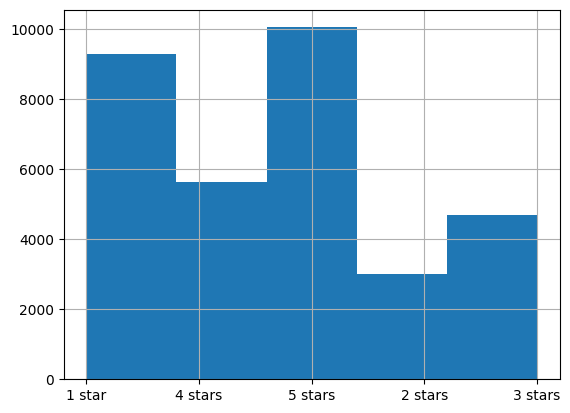

rating
1 star      9305
2 stars     3020
3 stars     4706
4 stars     5646
5 stars    10059
Name: reviewer_id, dtype: int64


In [14]:
reviews.rating.hist(bins=5)
plt.show()
print(reviews.groupby('rating').count().reviewer_id)

In [16]:
rating_1 = reviews[reviews['rating'] == '1 star'].sample(n=3020)
rating_2 = reviews[reviews['rating'] == '2 stars'].sample(n=3020)
rating_3 = reviews[reviews['rating'] == '3 stars'].sample(n=3020)
rating_4 = reviews[reviews['rating'] == '4 stars'].sample(n=3020)
rating_5 = reviews[reviews['rating'] == '5 stars'].sample(n=3020)

In [17]:
reviews_sample = pd.concat([rating_1, rating_2, rating_3, rating_4, rating_5],axis=0)
reviews_sample.reset_index(drop=True, inplace=True)

In [19]:
print(reviews_sample.groupby('rating').count().reviewer_id)

rating
1 star     3020
2 stars    3020
3 stars    3020
4 stars    3020
5 stars    3020
Name: reviewer_id, dtype: int64


In [20]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

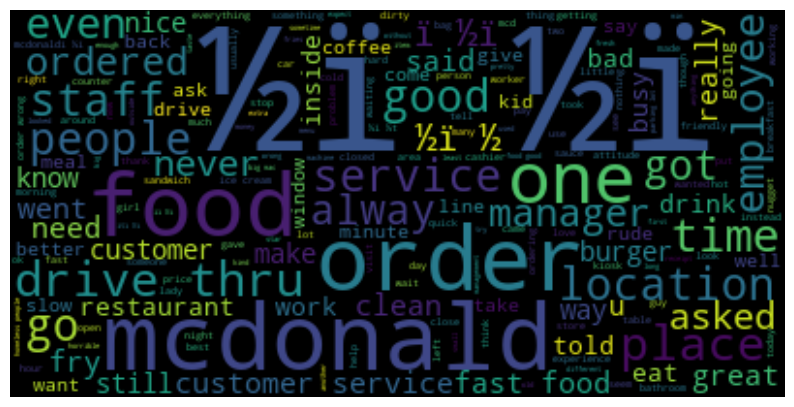

In [22]:
reviews_str = reviews_sample.review.str.cat()
wordcloud = WordCloud(background_color = 'black').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
negative_reviews = reviews_sample[reviews_sample['rating'].isin(['1 star','2 stars'])]
positive_reviews = reviews_sample[reviews_sample['rating'].isin(['4 stars','5 stars'])]

negative_reviews_str = negative_reviews.review.str.cat()
positive_reviews_str = positive_reviews.review.str.cat()

In [31]:
wordcloud_negative = WordCloud(background_color='black').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='black').generate(positive_reviews_str)

Text(0.5, 1.0, 'Reviews with Negative Scores')

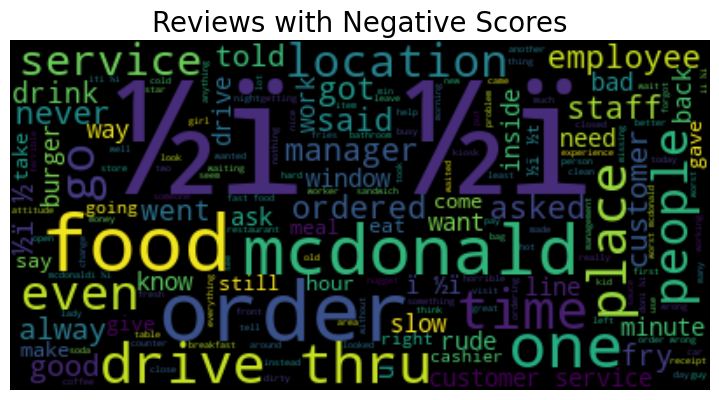

In [32]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)

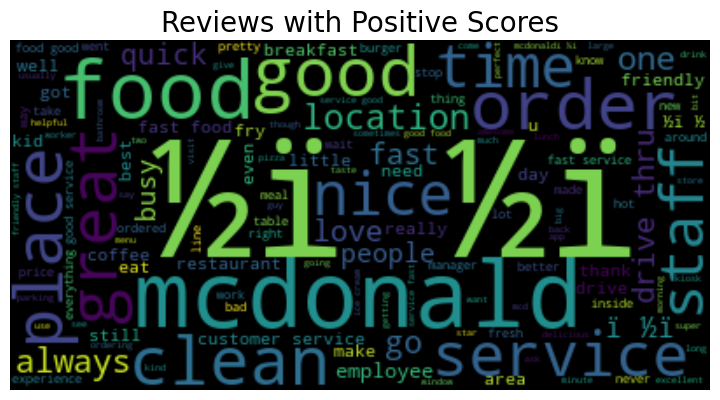

In [33]:
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()